In [1]:
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import tabpy_client 

In [2]:
engine = sa.create_engine('mssql+pyodbc://sa:sa@123@SKPC-30')


In [3]:
month='5'
year='2019'
warehouseid='1'

In [4]:
sql = '''\
            exec GetLabelCustomerDetail 5,2019,1
'''

In [5]:
sql2 = '''\
            exec GetLabelCustomerDetail {month},{year},{warehouseid}
'''

In [6]:
df=pd.read_sql_query(sql,engine)
df.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active
0,SK10009,0,0,0.000,0.0,0,0,True
1,SK10021,0,0,0.000,0.0,0,0,True
2,SK10030,1,9,10586.018,0.0,100,0,True
3,SK10037,1,7,14460.112,0.0,100,0,True
4,SK10041,0,0,0.000,0.0,0,0,True


In [7]:
df_MAY = df.copy()

In [8]:
df_MAY.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active
0,SK10009,0,0,0.000,0.0,0,0,True
1,SK10021,0,0,0.000,0.0,0,0,True
2,SK10030,1,9,10586.018,0.0,100,0,True
3,SK10037,1,7,14460.112,0.0,100,0,True
4,SK10041,0,0,0.000,0.0,0,0,True


## VISUALIZATION

In [9]:
df_MAY.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active
0,SK10009,0,0,0.000,0.0,0,0,True
1,SK10021,0,0,0.000,0.0,0,0,True
2,SK10030,1,9,10586.018,0.0,100,0,True
3,SK10037,1,7,14460.112,0.0,100,0,True
4,SK10041,0,0,0.000,0.0,0,0,True


## total volume purchased over month

In [10]:
df_to_vol=df_MAY[['Skcode','Totalvolume']].copy()

In [11]:
df_to_vol.head()

,Skcode,Totalvolume
0,SK10009,0.000
1,SK10021,0.000
2,SK10030,10586.018
3,SK10037,14460.112
4,SK10041,0.000


In [12]:
df['Totalvolume'].mean()


4862.677921395348

In [13]:
df_to_vol.sort_values(by='Totalvolume',ascending=False).head()


,Skcode,Totalvolume
1728,SK20659,591408.000
4209,SK9614,521491.409
3051,SK7510,511675.758
3494,SK8189,385231.746
3715,SK8429,385187.676


Text(0.5, 0.98, 'MonthlyVolume')

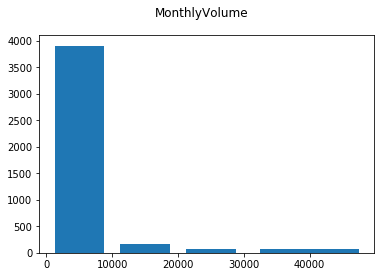

In [14]:
plt.hist(df_to_vol['Totalvolume'],bins=[0,10000,20000,30000,50000],rwidth=0.75)
plt.suptitle("MonthlyVolume")



##  no of order per month

In [15]:
df_nooforder=df_MAY[['Skcode','nooforder']].copy()
df_nooforder.head()

,Skcode,nooforder
0,SK10009,0
1,SK10021,0
2,SK10030,1
3,SK10037,1
4,SK10041,0


In [16]:
df_nooforder.sort_values(by='nooforder',ascending=False).head()


,Skcode,nooforder
152,SK11696,62
4209,SK9614,45
3877,SK8599,32
74,SK10376,30
2109,SK4036,26


In [17]:
df['nooforder'].mean()


0.6325581395348837

Text(0.5, 0.98, 'nooforder')

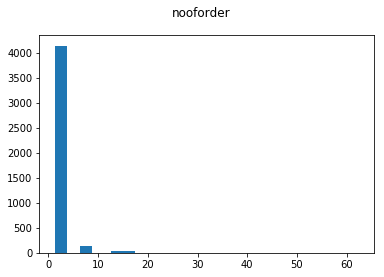

In [18]:
plt.hist(df_nooforder['nooforder'],bins=[0,5,10,20,40,70],rwidth=0.50)
plt.suptitle("nooforder")



## number of brand

In [19]:
df_noofbrand=df_MAY[['Skcode','noofbrand']].copy()
df_noofbrand.head()

,Skcode,noofbrand
0,SK10009,0
1,SK10021,0
2,SK10030,9
3,SK10037,7
4,SK10041,0


In [20]:
df_noofbrand.sort_values(by='noofbrand',ascending=False).head()


,Skcode,noofbrand
2300,SK4230,49
4186,SK9433,44
2623,SK4562,40
3328,SK7918,39
3100,SK7563,38


In [21]:
df['noofbrand'].mean()


1.8632558139534883

Text(0.5, 0.98, 'noofbrand')

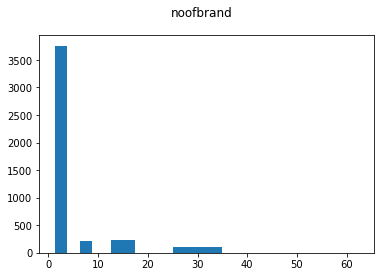

In [22]:
plt.hist(df_noofbrand['noofbrand'],bins=[0,5,10,20,40,70],rwidth=0.50)
plt.suptitle("noofbrand")



## kisan kirana volume

In [23]:
df_KKvolume=df_MAY[['Skcode','KKvolume']].copy()
df_KKvolume.head()

,Skcode,KKvolume
0,SK10009,0.0
1,SK10021,0.0
2,SK10030,0.0
3,SK10037,0.0
4,SK10041,0.0


In [24]:
df_KKvolume.sort_values(by='KKvolume',ascending=False).head()


,Skcode,KKvolume
4191,SK9461,247673.800
2108,SK4035,122396.250
4209,SK9614,99002.855
4173,SK9372,93345.000
3872,SK8594,68656.150


In [25]:
df['KKvolume'].mean()


662.393065116279

Text(0.5, 0.98, 'KKvolume')

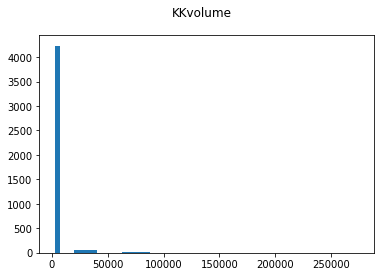

In [26]:
plt.hist(df_KKvolume['KKvolume'],bins=[0,10000,50000,100000,200000,300000],rwidth=0.50)
plt.suptitle("KKvolume")



##  Customer ordered through his own app

In [27]:
df_SelforderPercentage=df_MAY[['Skcode','SelforderPercentage']].copy()
df_SelforderPercentage.head()

,Skcode,SelforderPercentage
0,SK10009,0
1,SK10021,0
2,SK10030,0
3,SK10037,0
4,SK10041,0


In [28]:
df_SelforderPercentage.sort_values(by='SelforderPercentage',ascending=False).head()


,Skcode,SelforderPercentage
4141,SK9219,100
3587,SK8291,100
2801,SK4742,100
4006,SK8776,100
1628,SK20395,100


In [29]:
df['SelforderPercentage'].mean()


7.658604651162791

Text(0.5, 0.98, 'SelforderPercentage')

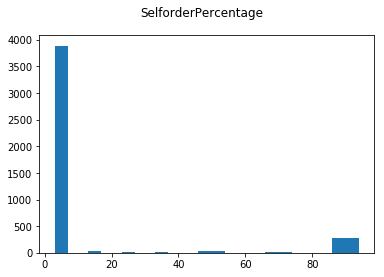

In [30]:
plt.hist(df_SelforderPercentage['SelforderPercentage'],bins=[0,10,20,30,40,60,80,100],rwidth=0.40)
plt.suptitle("SelforderPercentage")



## Levelling

In [31]:
df_MAY.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active
0,SK10009,0,0,0.000,0.0,0,0,True
1,SK10021,0,0,0.000,0.0,0,0,True
2,SK10030,1,9,10586.018,0.0,100,0,True
3,SK10037,1,7,14460.112,0.0,100,0,True
4,SK10041,0,0,0.000,0.0,0,0,True


l2

>3 orders a month
More than 5 brands 
Monthly volume 10K

l3

>5+ orders a month
More than 10 brands 
Monthly volume 20k
Kisan Kirana 2k+

l4

>8+ orders a month
More than 30+ brands 
Monthly volume 30K
Kisan kirana: 8K+
Order by app 


l5

>12+ orders a month
More than 50+ brands 
Monthly volume 50K
Kisan kirana : 15K+
Order by app 100%



In [32]:
count =0

In [33]:
# l1 customers list down 



In [34]:
ACTIVE = df[(df.active == 1)]
INACTIVE = df[(df.active == 0)]





In [35]:
ACTIVE.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active
0,SK10009,0,0,0.000,0.0,0,0,True
1,SK10021,0,0,0.000,0.0,0,0,True
2,SK10030,1,9,10586.018,0.0,100,0,True
3,SK10037,1,7,14460.112,0.0,100,0,True
4,SK10041,0,0,0.000,0.0,0,0,True


In [36]:
ACTIVE.count()

Skcode                        2491
nooforder                     2491
noofbrand                     2491
Totalvolume                   2491
KKvolume                      2491
SalesPersonPercentageorder    2491
SelforderPercentage           2491
active                        2491
dtype: int64

In [37]:
INACTIVE.count()

Skcode                        1809
nooforder                     1809
noofbrand                     1809
Totalvolume                   1809
KKvolume                      1809
SalesPersonPercentageorder    1809
SelforderPercentage           1809
active                        1809
dtype: int64

In [38]:
df= ACTIVE

In [39]:
df.count()

Skcode                        2491
nooforder                     2491
noofbrand                     2491
Totalvolume                   2491
KKvolume                      2491
SalesPersonPercentageorder    2491
SelforderPercentage           2491
active                        2491
dtype: int64

In [40]:
df.loc[df.Totalvolume == 0, 'levels'] = 'level_0'
df.loc[df.Totalvolume >= 1, 'levels'] = 'level_1'
df.loc[(df.Totalvolume >= 10000) & (df.nooforder >= 3) & (df.noofbrand >= 5), 'levels'] = 'level_2'
df.loc[(df.Totalvolume >= 20000) & (df.nooforder >= 5) & (df.noofbrand >= 10) & (df.KKvolume >= 2000), 'levels'] = 'level_3'
df.loc[(df.Totalvolume >= 30000) & (df.nooforder >= 8) & (df.noofbrand >= 30) & (df.KKvolume >= 8000) & (df.SalesPersonPercentageorder < 100), 'levels'] = 'level_4'
df.loc[(df.Totalvolume >= 500000) & (df.nooforder >= 12) & (df.noofbrand >= 50) & (df.KKvolume >= 15000) & (df.SelforderPercentage == 100), 'levels'] = 'level_5'

In [41]:
df.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels
0,SK10009,0,0,0.000,0.0,0,0,True,level_0
1,SK10021,0,0,0.000,0.0,0,0,True,level_0
2,SK10030,1,9,10586.018,0.0,100,0,True,level_1
3,SK10037,1,7,14460.112,0.0,100,0,True,level_1
4,SK10041,0,0,0.000,0.0,0,0,True,level_0


In [42]:
df.count()

Skcode                        2491
nooforder                     2491
noofbrand                     2491
Totalvolume                   2491
KKvolume                      2491
SalesPersonPercentageorder    2491
SelforderPercentage           2491
active                        2491
levels                        2491
dtype: int64

In [43]:
df.loc[df['levels']=='level_0'].count()


Skcode                        1666
nooforder                     1666
noofbrand                     1666
Totalvolume                   1666
KKvolume                      1666
SalesPersonPercentageorder    1666
SelforderPercentage           1666
active                        1666
levels                        1666
dtype: int64

In [44]:
df.loc[df['levels']=='level_1'].max()


Skcode                         SK9940
nooforder                          11
noofbrand                          33
Totalvolume                    591408
KKvolume                       247674
SalesPersonPercentageorder        100
SelforderPercentage               100
active                           True
levels                        level_1
dtype: object

In [45]:
df.loc[df['levels']=='level_2'].max()


Skcode                         SK9969
nooforder                          62
noofbrand                          49
Totalvolume                    385232
KKvolume                        67610
SalesPersonPercentageorder        100
SelforderPercentage               100
active                           True
levels                        level_2
dtype: object

In [46]:
df.loc[df['levels']=='level_3'].max()


Skcode                         SK9702
nooforder                          16
noofbrand                          40
Totalvolume                    308750
KKvolume                       122396
SalesPersonPercentageorder        100
SelforderPercentage                97
active                           True
levels                        level_3
dtype: object

In [47]:
df.loc[df['levels']=='level_4'].max()


Skcode                         SK9614
nooforder                          45
noofbrand                          32
Totalvolume                    521491
KKvolume                      99002.9
SalesPersonPercentageorder         98
SelforderPercentage                61
active                           True
levels                        level_4
dtype: object

In [48]:
df.loc[df['levels']=='level_5'].count()


Skcode                        0
nooforder                     0
noofbrand                     0
Totalvolume                   0
KKvolume                      0
SalesPersonPercentageorder    0
SelforderPercentage           0
active                        0
levels                        0
dtype: int64


l2

3 orders a month More than 5 brands Monthly volume 10K

l3

5+ orders a month More than 10 brands Monthly volume 20k Kisan Kirana 2k+

l4

8+ orders a month More than 30+ brands Monthly volume 30K Kisan kirana: 8K+ Order by app

l5

12+ orders a month More than 50+ brands Monthly volume 50K Kisan kirana : 15K+ Order by app 100%

In [49]:
df.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels
0,SK10009,0,0,0.000,0.0,0,0,True,level_0
1,SK10021,0,0,0.000,0.0,0,0,True,level_0
2,SK10030,1,9,10586.018,0.0,100,0,True,level_1
3,SK10037,1,7,14460.112,0.0,100,0,True,level_1
4,SK10041,0,0,0.000,0.0,0,0,True,level_0


In [50]:
df_level0 = df.loc[df['levels']=='level_0']
df_level0.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels
0,SK10009,0,0,0.0,0.0,0,0,True,level_0
1,SK10021,0,0,0.0,0.0,0,0,True,level_0
4,SK10041,0,0,0.0,0.0,0,0,True,level_0
5,SK10042,0,0,0.0,0.0,0,0,True,level_0
6,SK10043,0,0,0.0,0.0,0,0,True,level_0


In [51]:
df_level0.count()

Skcode                        1666
nooforder                     1666
noofbrand                     1666
Totalvolume                   1666
KKvolume                      1666
SalesPersonPercentageorder    1666
SelforderPercentage           1666
active                        1666
levels                        1666
dtype: int64

In [52]:
df_level1 = df.loc[df['levels']=='level_1']
df_level1.max()

Skcode                         SK9940
nooforder                          11
noofbrand                          33
Totalvolume                    591408
KKvolume                       247674
SalesPersonPercentageorder        100
SelforderPercentage               100
active                           True
levels                        level_1
dtype: object

In [53]:
df_level1.count()

Skcode                        552
nooforder                     552
noofbrand                     552
Totalvolume                   552
KKvolume                      552
SalesPersonPercentageorder    552
SelforderPercentage           552
active                        552
levels                        552
dtype: int64

In [54]:
df_level2 = df.loc[df['levels']=='level_2']
df_level2.max()

Skcode                         SK9969
nooforder                          62
noofbrand                          49
Totalvolume                    385232
KKvolume                        67610
SalesPersonPercentageorder        100
SelforderPercentage               100
active                           True
levels                        level_2
dtype: object

In [55]:
df_level2.count()

Skcode                        233
nooforder                     233
noofbrand                     233
Totalvolume                   233
KKvolume                      233
SalesPersonPercentageorder    233
SelforderPercentage           233
active                        233
levels                        233
dtype: int64

In [56]:
df_level3 = df.loc[df['levels']=='level_3']
df_level3.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels
29,SK10154,8,11,83766.181,5486.25,80,19,True,level_3
85,SK10427,7,12,28547.754,5486.25,88,11,True,level_3
208,SK14040,9,18,91358.418,2292.84,87,12,True,level_3
1115,SK19080,12,11,143462.461,31671.00,47,52,True,level_3
1734,SK20678,14,21,308749.926,38615.10,2,97,True,level_3


In [57]:
df_level3.count()

Skcode                        36
nooforder                     36
noofbrand                     36
Totalvolume                   36
KKvolume                      36
SalesPersonPercentageorder    36
SelforderPercentage           36
active                        36
levels                        36
dtype: int64

In [58]:
df_level4 = df.loc[df['levels']=='level_4']
df_level4.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels
3051,SK7510,14,30,511675.758,29051.500,98,1,True,level_4
3322,SK7906,11,31,184416.300,9420.300,95,4,True,level_4
4070,SK8856,16,32,116841.532,12599.550,38,61,True,level_4
4209,SK9614,45,32,521491.409,99002.855,75,24,True,level_4


In [59]:
df_level4.count()

Skcode                        4
nooforder                     4
noofbrand                     4
Totalvolume                   4
KKvolume                      4
SalesPersonPercentageorder    4
SelforderPercentage           4
active                        4
levels                        4
dtype: int64

In [60]:
df_level5 = df.loc[df['levels']=='level_5']
df_level5.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels


In [61]:
df_level5.count()

Skcode                        0
nooforder                     0
noofbrand                     0
Totalvolume                   0
KKvolume                      0
SalesPersonPercentageorder    0
SelforderPercentage           0
active                        0
levels                        0
dtype: int64

In [62]:
df_level0.mean()

nooforder                       0.000000
noofbrand                       0.000000
Totalvolume                     0.000000
KKvolume                      155.675712
SalesPersonPercentageorder      0.000000
SelforderPercentage             0.000000
active                          1.000000
dtype: float64

## writing data into the excel file

df_level0.to_excel('C:/Users/A.Kislaya/Downloads/level0.xlsx')
df_level1.to_excel('C:/Users/A.Kislaya/Downloads/level1.xlsx')
df_level2.to_excel('C:/Users/A.Kislaya/Downloads/level2.xlsx')
df_level3.to_excel('C:/Users/A.Kislaya/Downloads/level3.xlsx')
df_level4.to_excel('C:/Users/A.Kislaya/Downloads/level4.xlsx')
df_level5.to_excel('C:/Users/A.Kislaya/Downloads/level5.xlsx')

In [63]:
df_level1['Totalvolume'].mean()

10430.371351449276

In [64]:
df_level2['Totalvolume'].mean()

44768.473497854065

In [65]:
df_level3['Totalvolume'].mean()

86804.43541666665

In [66]:
df_level4['Totalvolume'].mean()

333606.2497500001

In [67]:
df_level5.mean()

Skcode                       NaN
nooforder                    NaN
noofbrand                    NaN
Totalvolume                  NaN
KKvolume                     NaN
SalesPersonPercentageorder   NaN
SelforderPercentage          NaN
active                       NaN
levels                       NaN
dtype: float64

## ALLOCATION BY SUM PERCENTAGE

In [68]:
def AllocationLevels(fund) :
    l0_sum = df_level0['Totalvolume'].sum()
    l1_sum = df_level1['Totalvolume'].sum()
    l2_sum = df_level2['Totalvolume'].sum()
    l3_sum = df_level3['Totalvolume'].sum()
    l4_sum = df_level4['Totalvolume'].sum()
    l5_sum = df_level5['Totalvolume'].sum()
    summ = l0_sum + l1_sum + l2_sum + l3_sum +l4_sum + l5_sum
    
    l0_per = (l0_sum/summ)*100
    l1_per = (l1_sum/summ)*100
    l2_per = (l2_sum/summ)*100
    l3_per = (l3_sum/summ)*100
    l4_per = (l4_sum/summ)*100
    l5_per = (l5_sum/summ)*100
    
    
    amount_l0=l0_per*fund
    amount_l1=l1_per*fund
    amount_l2=l2_per*fund
    amount_l3=l3_per*fund
    amount_l4=l4_per*fund
    amount_l5=l5_per*fund
    
    print("percentage share L0 level ",l0_per )
    print("allocation amount L0 level ",amount_l0 )
    print()
    
    print("percentage share L1 level ",l1_per )
    print("allocation amount L1 level ",amount_l1 )
    print()
    
    print("percentage allocation L2 level ",l2_per )
    print("allocation amount L2 level ",amount_l2 )
    print()
    
    print("percentage allocation L3 level ",l3_per )
    print("allocation amount L3 level ",amount_l3 )
    print()
    
    print("percentage allocation L4 level ",l4_per )
    print("allocation amount L4 level ",amount_l4 )
    print()
    
    print("percentage allocation L5 level ",l5_per )
    print("allocation amount L5 level ",amount_l5 )
    print()
    

    

In [69]:
if __name__ == "__main__":
    fund = int(input("Enter the offer fund to be allocated"))
    AllocationLevels(fund)

Enter the offer fund to be allocated 100000


percentage share L0 level  0.0
allocation amount L0 level  0.0

percentage share L1 level  27.884365918287575
allocation amount L1 level  2788436.5918287574

percentage allocation L2 level  50.51846334676111
allocation amount L2 level  5051846.334676111

percentage allocation L3 level  15.13443951904584
allocation amount L3 level  1513443.951904584

percentage allocation L4 level  6.462731215905469
allocation amount L4 level  646273.1215905469

percentage allocation L5 level  0.0
allocation amount L5 level  0.0



In [70]:
l1_sum = df_level1['Totalvolume'].sum()
l1_sum

5757564.986

In [71]:
l2_sum = df_level2['Totalvolume'].sum()
l2_sum

10431054.325

In [72]:
l3_sum = df_level3['Totalvolume'].sum()
l3_sum

3124959.675

In [73]:
l4_sum=df_level4['Totalvolume'].sum()
l4_sum

1334424.9990000003

In [74]:
sum = l1_sum + l2_sum + l3_sum +l4_sum
sum

20648003.985

In [75]:
l1_per = (l1_sum/sum)
l2_per = (l2_sum/sum)
l3_per = (l3_sum/sum)
l4_per = (l4_sum/sum)

In [76]:
l1_per 


0.27884365918287574

In [77]:
l2_per


0.5051846334676111

In [78]:
l3_per


0.1513443951904584

In [79]:
l4_per 

0.06462731215905469

In [80]:
investment = 100000

In [81]:
amount_l1=l1_per*investment
amount_l2=l2_per*investment
amount_l3=l3_per*investment
amount_l4=l4_per*investment

In [82]:
amount_l1

27884.365918287574

In [83]:
amount_l2

50518.46334676111

In [84]:
amount_l3

15134.43951904584

In [85]:
amount_l4

6462.731215905469

In [86]:
df_level2.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels
7,SK10044,24,29,239042.063,838.20,97,2,True,level_2
25,SK10121,3,5,19956.880,0.00,100,0,True,level_2
27,SK10150,4,36,45946.964,0.00,0,100,True,level_2
43,SK10202,4,23,51223.978,7763.07,100,0,True,level_2
45,SK10209,3,7,23630.302,30068.13,92,7,True,level_2


In [87]:
level2_allocation=df_level2[['Skcode','Totalvolume']]
level2_allocation=level2_allocation.sort_values(by='Totalvolume',ascending=False)
level2_allocation.head()

,Skcode,Totalvolume
3494,SK8189,385231.746
3715,SK8429,385187.676
3877,SK8599,369252.909
3414,SK8067,270410.544
3376,SK7981,247579.580


In [88]:
sum2=level2_allocation['Totalvolume'].sum()

In [89]:
level2_allocation['allocation'] = (level2_allocation['Totalvolume']/sum2) * amount_l2

In [90]:
level2_allocation

,Skcode,Totalvolume,allocation
3494,SK8189,385231.746,1865.709375
3715,SK8429,385187.676,1865.495940
3877,SK8599,369252.909,1788.322538
3414,SK8067,270410.544,1309.620747
3376,SK7981,247579.580,1199.048490
7,SK10044,239042.063,1157.700585
108,SK10597,236283.890,1144.342524
4131,SK9175,233867.202,1132.638303
1349,SK19726,212981.019,1031.484783
4194,SK9477,207927.170,1007.008572


In [91]:
level2_allocation['allocation'].min()

48.593399184197224

In [92]:
level2_allocation['allocation'].sum()

50518.46334676112

In [93]:
df_level3.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels
29,SK10154,8,11,83766.181,5486.25,80,19,True,level_3
85,SK10427,7,12,28547.754,5486.25,88,11,True,level_3
208,SK14040,9,18,91358.418,2292.84,87,12,True,level_3
1115,SK19080,12,11,143462.461,31671.00,47,52,True,level_3
1734,SK20678,14,21,308749.926,38615.10,2,97,True,level_3


In [94]:
level3_allocation=df_level3[['Skcode','Totalvolume']]
level3_allocation=level3_allocation.sort_values(by='Totalvolume',ascending=False)
level3_allocation.head()

,Skcode,Totalvolume
1734,SK20678,308749.926
3369,SK7973,207420.508
3305,SK7876,168163.517
2108,SK4035,154122.470
1115,SK19080,143462.461


In [95]:
sum3=level3_allocation['Totalvolume'].sum()

In [96]:
level3_allocation['allocation'] = (level3_allocation['Totalvolume']/sum3) * amount_l3


In [97]:
level3_allocation.head()

,Skcode,Totalvolume,allocation
1734,SK20678,308749.926,1495.301561
3369,SK7973,207420.508,1004.554765
3305,SK7876,168163.517,814.429894
2108,SK4035,154122.470,746.427936
1115,SK19080,143462.461,694.800626


In [98]:
level3_allocation['allocation'].sum()

15134.439519045838

In [99]:
level4_allocation=df_level4[['Skcode','Totalvolume']]
level4_allocation=level4_allocation.sort_values(by='Totalvolume',ascending=False)
level4_allocation

,Skcode,Totalvolume
4209,SK9614,521491.409
3051,SK7510,511675.758
3322,SK7906,184416.300
4070,SK8856,116841.532


In [100]:
sum4=level4_allocation['Totalvolume'].sum()

In [101]:
level4_allocation['allocation'] = (level4_allocation['Totalvolume']/sum4) * amount_l4


In [102]:
level4_allocation

,Skcode,Totalvolume,allocation
4209,SK9614,521491.409,2525.626251
3051,SK7510,511675.758,2478.088237
3322,SK7906,184416.300,893.143473
4070,SK8856,116841.532,565.873254


In [103]:
level4_allocation['allocation'].sum()

6462.731215905469

In [104]:
level1_allocation=df_level1[['Skcode','Totalvolume']]
level1_allocation=level1_allocation.sort_values(by='Totalvolume',ascending=False)
level1_allocation.head()

,Skcode,Totalvolume
1728,SK20659,591408.000
1538,SK20183,347508.000
2232,SK4160,287587.800
1713,SK20610,128598.840
1699,SK20582,120791.136


In [105]:
sum1=level1_allocation['Totalvolume'].sum()

In [106]:
level1_allocation['allocation'] = (level1_allocation['Totalvolume']/sum1) * amount_l1


In [107]:
level1_allocation.head()

,Skcode,Totalvolume,allocation
1728,SK20659,591408.000,2864.238114
1538,SK20183,347508.000,1683.010136
2232,SK4160,287587.800,1392.811626
1713,SK20610,128598.840,622.814874
1699,SK20582,120791.136,585.001514


In [108]:
level1_allocation['allocation'].sum()

27884.365918287574

## Promotion retention

In [109]:
df_level1.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels
2,SK10030,1,9,10586.018,0.000,100,0,True,level_1
3,SK10037,1,7,14460.112,0.000,100,0,True,level_1
8,SK10045,2,3,1996.296,1477.980,66,33,True,level_1
14,SK10071,3,10,3248.240,0.000,0,100,True,level_1
15,SK10073,3,22,6527.179,56.528,0,100,True,level_1


In [110]:
avg_level1= df_level1['Totalvolume'].mean()
avg_level1

10430.371351449276

In [111]:
df_level1.loc[df_level1.Totalvolume >= avg_level1, 'State'] = 'Promotion'
df_level1.loc[df_level1.Totalvolume < avg_level1, 'State'] = 'Retention'

df_level1.head()

C:\Users\A.Kislaya\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\A.Kislaya\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels,State
2,SK10030,1,9,10586.018,0.000,100,0,True,level_1,Promotion
3,SK10037,1,7,14460.112,0.000,100,0,True,level_1,Promotion
8,SK10045,2,3,1996.296,1477.980,66,33,True,level_1,Retention
14,SK10071,3,10,3248.240,0.000,0,100,True,level_1,Retention
15,SK10073,3,22,6527.179,56.528,0,100,True,level_1,Retention


In [112]:
avg_level2= df_level2['Totalvolume'].mean()
avg_level2

44768.473497854065

In [113]:
df_level2.loc[df_level2.Totalvolume >= avg_level2, 'State'] = 'Promotion'
df_level2.loc[df_level2.Totalvolume < avg_level2, 'State'] = 'Retention'

df_level2.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels,State
7,SK10044,24,29,239042.063,838.20,97,2,True,level_2,Promotion
25,SK10121,3,5,19956.880,0.00,100,0,True,level_2,Retention
27,SK10150,4,36,45946.964,0.00,0,100,True,level_2,Promotion
43,SK10202,4,23,51223.978,7763.07,100,0,True,level_2,Promotion
45,SK10209,3,7,23630.302,30068.13,92,7,True,level_2,Retention


In [114]:
avg_level3= df_level3['Totalvolume'].mean()
avg_level3

86804.43541666665

In [115]:
df_level3.loc[df_level3.Totalvolume >= avg_level3, 'State'] = 'Promotion'
df_level3.loc[df_level3.Totalvolume < avg_level3, 'State'] = 'Retention'

df_level3.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels,State
29,SK10154,8,11,83766.181,5486.25,80,19,True,level_3,Retention
85,SK10427,7,12,28547.754,5486.25,88,11,True,level_3,Retention
208,SK14040,9,18,91358.418,2292.84,87,12,True,level_3,Promotion
1115,SK19080,12,11,143462.461,31671.00,47,52,True,level_3,Promotion
1734,SK20678,14,21,308749.926,38615.10,2,97,True,level_3,Promotion


In [116]:
avg_level4= df_level4['Totalvolume'].mean()
avg_level4

333606.2497500001

In [117]:
df_level4.loc[df_level4.Totalvolume >= avg_level4, 'State'] = 'Promotion'
df_level4.loc[df_level4.Totalvolume < avg_level4, 'State'] = 'Retention'

df_level4

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels,State
3051,SK7510,14,30,511675.758,29051.500,98,1,True,level_4,Promotion
3322,SK7906,11,31,184416.300,9420.300,95,4,True,level_4,Retention
4070,SK8856,16,32,116841.532,12599.550,38,61,True,level_4,Retention
4209,SK9614,45,32,521491.409,99002.855,75,24,True,level_4,Promotion


## customer lifetime value

In [118]:
##  customer lifetime value = (AverageOrderValue) * (NumberOfRepeatSales) * (AverageCustomerLifeSpan)

In [119]:
df.head()

,Skcode,nooforder,noofbrand,Totalvolume,KKvolume,SalesPersonPercentageorder,SelforderPercentage,active,levels
0,SK10009,0,0,0.000,0.0,0,0,True,level_0
1,SK10021,0,0,0.000,0.0,0,0,True,level_0
2,SK10030,1,9,10586.018,0.0,100,0,True,level_1
3,SK10037,1,7,14460.112,0.0,100,0,True,level_1
4,SK10041,0,0,0.000,0.0,0,0,True,level_0


 ## Minimizer

In [120]:
import scipy.optimize as spo
import numpy as np

In [121]:
def f(x):
    y=(x-1.5)**2 + 0.5
    print("x={}, y={}".format(x,y))
    return y



In [122]:
def test_run():
    xguess = 2.0
    min_result = spo.minimize(f,xguess,method='SLSQP',options={'disp':True})
    print("Minima found at: ")
    print("x = {}, y = {}".format(min_result.x,min_result.fun))
    
    #plot function values, mark minima
    xplot = np.linspace(0.5,2.5,21)
    yplot = f(xplot)
    plt.plot(xplot,yplot)
    plt.plot(min_result.x,min_result.fun,'ro')
    plt.title("Minima of an objective function")
    plt.show()

x=[2.], y=[0.75]
x=[2.], y=[0.75]
x=[2.00000001], y=[0.75000001]
x=[0.99999999], y=[0.75000001]
x=[1.5], y=[0.5]
x=[1.5], y=[0.5]
x=[1.50000001], y=[0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at: 
x = [1.5], y = 0.5
x=[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], y=[1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


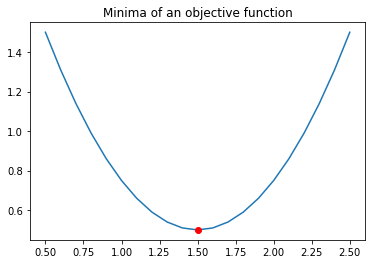

In [123]:
if __name__ == "__main__":
    test_run()
    

In [124]:
# NORMALISATION

# level2_allocation['Totalvolume']=level2_allocation['Totalvolume']/max
